<a href="https://colab.research.google.com/github/buthaina279/DS_EDA_example/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import Libraries

from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
from google.colab import drive  
#import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import itertools

In [15]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/twitter_analysis'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
saudia_airlines = pd.read_csv("./gdrive/My Drive/datasets/twitter_analysis/saudia_airlines_classified.csv")

In [17]:
saudia_airlines.head(10)

,Unnamed: 0,Unnamed: 0.1,tweet_id,created_at,text,likes,retweeted,location,language,airline,nonstop_documents,sentiment_confidence,polarity,sentiment
0,0,14,1335393841810202624,2020-12-06 01:21:16,dear guest there is no flight from india to s...,1,False,Saudi Arabia,en,Saudi_airlines,dear guest flight india saudi arabia time kin...,0.900,0.600,Positive
1,1,23,1335337522738720770,2020-12-05 21:37:29,hello dear guest we hope you check and be inf...,1,False,Saudi Arabia,en,Saudi_airlines,hello dear guest hope check informed travel u...,0.375,-0.125,Negative
2,2,29,1335334320014315521,2020-12-05 21:24:45,hello dear guest please provide us with the b...,0,False,Saudi Arabia,en,Saudi_airlines,hello dear guest please provide u booking num...,0.400,0.100,Positive
3,3,38,1335322063851167748,2020-12-05 20:36:03,dear guest there is no flight from india to s...,1,False,Saudi Arabia,en,Saudi_airlines,dear guest flight india saudi arabia time fli...,0.000,0.000,Neutral
4,4,43,1335314759588122626,2020-12-05 20:07:02,hello dear guest you can follow up the flight...,1,False,Saudi Arabia,en,Saudi_airlines,hello dear guest follow flight schedule website,0.000,0.000,Neutral
5,5,50,1335306576312356865,2020-12-05 19:34:31,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,dear guest flight india saudi arabia time fli...,0.000,0.000,Neutral
6,6,51,1335304974679613443,2020-12-05 19:28:09,hello dear valued guest once the confirmation...,1,False,Saudi Arabia,en,Saudi_airlines,hello dear valued guest confirmation date lif...,0.000,0.000,Neutral
7,7,53,1335276146653589507,2020-12-05 17:33:36,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,dear guest flight india saudi arabia time fli...,0.000,0.000,Neutral
8,8,55,1335275872295804928,2020-12-05 17:32:30,dear guest there is no flight from india to s...,0,False,Saudi Arabia,en,Saudi_airlines,dear guest flight india saudi arabia time fli...,0.000,0.000,Neutral
9,9,57,1335266364739694593,2020-12-05 16:54:44,hello dear guest imran please provide us with...,0,False,Saudi Arabia,en,Saudi_airlines,hello dear guest imran please provide u ticke...,0.400,0.100,Positive


#EDA

In [49]:
saudia_airlines.shape

(1464, 8)

In [51]:
saudia_airlines.columns

Index(['likes', 'retweeted', 'location', 'airline', 'nonstop_documents',
       'sentiment_confidence', 'polarity', 'sentiment'],
      dtype='object')

In [52]:
#Check for missing values
100*saudia_airlines.isna().sum()/len(saudia_airlines)

likes                   0.0
retweeted               0.0
location                0.0
airline                 0.0
nonstop_documents       0.0
sentiment_confidence    0.0
polarity                0.0
sentiment               0.0
dtype: float64

In [54]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

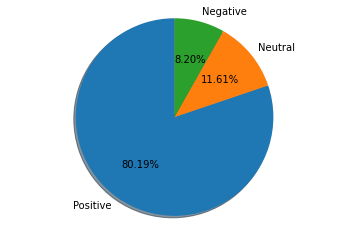

In [55]:
createPieChartFor(saudia_airlines.sentiment)

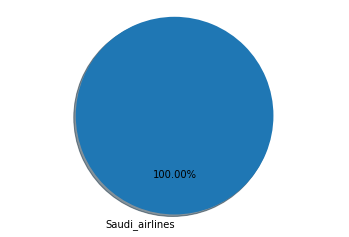

In [56]:
createPieChartFor(saudia_airlines.airline)

now check total tweets for each of the airlines and


how many of these tweets per airline are negative, positive and neutral

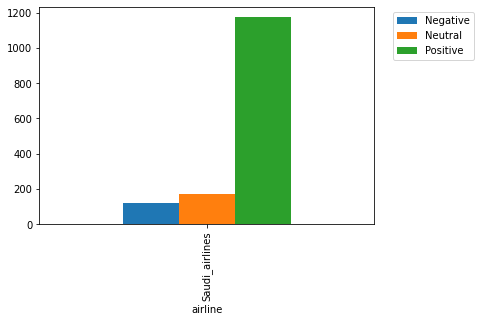

In [58]:
airline_sentiment_df = saudia_airlines.groupby(['airline','sentiment']).sentiment.count().unstack()
airline_sentiment_df.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [65]:
from wordcloud import WordCloud,STOPWORDS
def createWrdCloudForSentiment(sentiment):
    temp_df = saudia_airlines[saudia_airlines.sentiment==sentiment]
    words = " ".join(temp_df.nonstop_documents)
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT'])

    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1500,
                      height=1000).generate(cleaned_words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

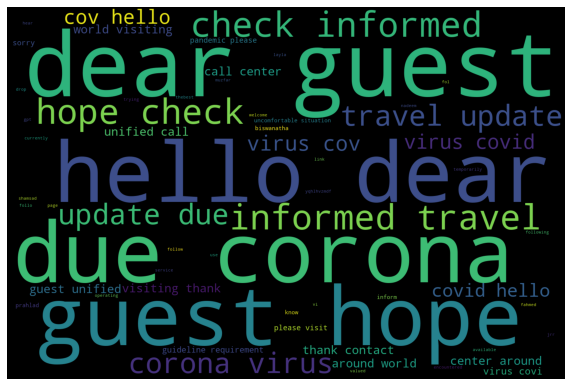

In [67]:
createWrdCloudForSentiment('Negative')

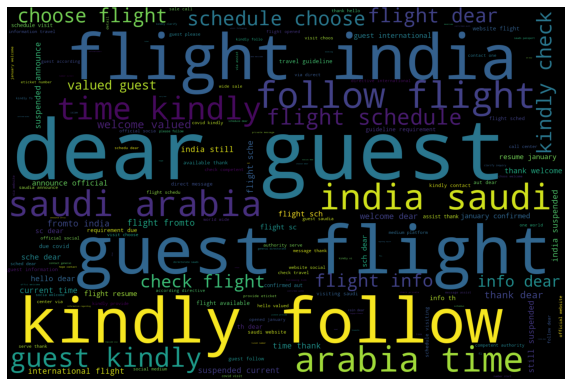

In [68]:
createWrdCloudForSentiment('Positive')

#preproccesing

#Delete uninformative variables

In [21]:
saudia_airlines = saudia_airlines.drop(['Unnamed: 0','Unnamed: 0.1','tweet_id', 'text', 'language', 'created_at'], axis=1)

In [22]:
saudia_airlines.head(10)

,likes,retweeted,location,airline,nonstop_documents,sentiment_confidence,polarity,sentiment
0,1,False,Saudi Arabia,Saudi_airlines,dear guest flight india saudi arabia time kin...,0.900,0.600,Positive
1,1,False,Saudi Arabia,Saudi_airlines,hello dear guest hope check informed travel u...,0.375,-0.125,Negative
2,0,False,Saudi Arabia,Saudi_airlines,hello dear guest please provide u booking num...,0.400,0.100,Positive
3,1,False,Saudi Arabia,Saudi_airlines,dear guest flight india saudi arabia time fli...,0.000,0.000,Neutral
4,1,False,Saudi Arabia,Saudi_airlines,hello dear guest follow flight schedule website,0.000,0.000,Neutral
5,0,False,Saudi Arabia,Saudi_airlines,dear guest flight india saudi arabia time fli...,0.000,0.000,Neutral
6,1,False,Saudi Arabia,Saudi_airlines,hello dear valued guest confirmation date lif...,0.000,0.000,Neutral
7,0,False,Saudi Arabia,Saudi_airlines,dear guest flight india saudi arabia time fli...,0.000,0.000,Neutral
8,0,False,Saudi Arabia,Saudi_airlines,dear guest flight india saudi arabia time fli...,0.000,0.000,Neutral
9,0,False,Saudi Arabia,Saudi_airlines,hello dear guest imran please provide u ticke...,0.400,0.100,Positive


#Devide the dataset into predictors and target

In [25]:
X = saudia_airlines.iloc[:,:-1].values #all predictor columns without the target
y = saudia_airlines.iloc[:,-1].values #last column (target)

#Encoding the independent variables

- retweeted
- location
- airline

In [26]:
ct = ColumnTransformer(transformers=[('encoder',
                                      OneHotEncoder(), 
                                      [1,2,3])], 
                                      remainder='passthrough')

X = ct.fit_transform(X)
X = np.array(X)
print(X)


[[1.0 1.0 1.0 ...
  ' dear guest flight india saudi arabia time kindly follow flight ' 0.9
  0.6]
 [1.0 1.0 1.0 ...
  ' hello dear guest hope check informed travel update due corona virus covid '
  0.375 -0.125]
 [1.0 1.0 1.0 ...
  ' hello dear guest please provide u booking number direct message let know thank'
  0.4 0.1]
 ...
 [1.0 1.0 1.0 ...
  ' dear guest kindly check flight schedule choose flight info ' 0.9 0.6]
 [1.0 1.0 1.0 ... ' flight resumed show website book flight resident ex '
  0.0 0.0]
 [1.0 1.0 1.0 ...
  ' flight resumed show website yo book flight resident e ' 0.0 0.0]]


#Encoding the dependent variables


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[2 0 2 ... 2 1 1]


Dealing with datetime

In [61]:
from datetime import datetime
for date in saudia_airlines.iloc[:,0]:
  datetime_object = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

In [62]:
saudia_airlines.iloc[:,0]

0       2020-12-06 01:21:16
1       2020-12-05 21:37:29
2       2020-12-05 21:24:45
3       2020-12-05 20:36:03
4       2020-12-05 20:07:02
               ...         
1459    2020-10-25 13:13:11
1460    2020-10-25 13:13:05
1461    2020-10-25 13:13:00
1462    2020-10-25 12:18:46
1463    2020-10-25 12:13:41
Name: created_at, Length: 1464, dtype: object

for now I will delete and next time I'll add it and see if it can affect the classification

In [63]:
saudia_airlines = saudia_airlines.drop(['created_at'], axis=1)

In [ ]:
saudia_airlines['Tweet_nonstop']

#Extracting Features from Cleaned Tweets

https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/



CounterVectorizer method needs a list of strings and not tokens.*italicized text*

#Model calibration

https://towardsdatascience.com/classifier-calibration-7d0be1e05452

Let us now plot the Kernel Density Estimation for the two classifiers.

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(probs_lgr, label='Logistic regression')
sns.kdeplot(preds_svc, label='SVM')
plt.title("Probability Density Plot for 2 Classifiers")
plt.show()

let us check the AUC-ROC curve for the two binary classifiers, but this time using the probabilities we calculated for the SVM.

In [ ]:
from sklearn import metrics


plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1],'r--')

pred = probs_lgr
label = y_test
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr, tpr, label=f'Logistic regression, auc = {str(round(auc,3))}')

pred = probs_svc
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr, tpr, label=f'SVC, auc = {str(round(auc,3))}')

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("AUC-ROC for two models")
plt.legend()
plt.show()

To plot the calibration curve of each classifier we define a utility function like the one below.


In [ ]:
from sklearn.calibration import calibration_curve


def plot_calibration_curve(name, fig_index, probs):
    """Plot calibration curve for est w/o and with calibration. """

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    
    frac_of_pos, mean_pred_value = calibration_curve(y_test, probs, n_bins=10)

    ax1.plot(mean_pred_value, frac_of_pos, "s-", label=f'{name}')
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title(f'Calibration plot ({name})')
    
    ax2.hist(probs, range=(0, 1), bins=10, label=name, histtype="step", lw=2)
    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")

In [ ]:
# plot calibration curve for logistic regression
plot_calibration_curve("Logistic regression", 1, probs_lgr)

In [ ]:
# plot calibration curve for the SVM
plot_calibration_curve("SVM", 1, probs_svc)

#Calibrating the model

The two most popular methods of calibrating a machine learning model are the isotonic and Platt's method.

In [ ]:
from sklearn.calibration import CalibratedClassifierCV


lgr = LogisticRegression(C=1, solver='lbfgs')
svc = SVC(max_iter=10000, probability=True)

platts_scaling = CalibratedClassifierCV(svc, cv=2, method='sigmoid')
platts_scaling.fit(X_train, y_train)
calibrated_probs = platts_scaling.predict_proba(X_test)[:,1]

plot_calibration_curve("SVM", 3, calibrated_probs)

#Test-Train split

In [34]:
train_df, test_df = train_test_split(saudia_airlines, test_size=0.3, random_state=42)

In [35]:
train_tweets =[]
for tweet in train_df.nonstop_documents:
    train_tweets.append(tweet)
    
test_tweets =[]
for tweet in test_df.nonstop_documents:
    test_tweets.append(tweet)

#TF-IDF Features

This method  is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

In [36]:
# bag of words model
vectorizer = TfidfVectorizer()
train_tfidf_model = vectorizer.fit_transform(train_tweets)
test_tfidf_model = vectorizer.transform(test_tweets)

In [37]:
# let's look at the dataframe
train_tfidf = pd.DataFrame(train_tfidf_model.toarray(), columns=vectorizer.get_feature_names())
train_tfidf

,aasif,abdullah,abha,according,added,agency,ahmed,airline,allow,allowance,allowed,alq,always,amp,ann,announ,announce,announced,answered,arabia,arai,around,arslan,assist,aut,auth,autho,author,authori,authorit,authority,availab,availability,availabl,available,avoid,back,baggage,benefit,biswanatha,...,vi,via,virus,visa,visi,visit,visiting,voucher,wa,wasay,waseem,weather,websit,website,weekly,welcome,wide,wifi,wish,within,without,work,working,world,worldwide,would,yes,youre,youthank,youve,yqhlhvzmdf,zafarx,zam,zuel,الخطوطالسعودية,تهم,شهرالتوعيةبصحةالرجل,صحتك,موفمبر,نا
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.274592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.260913,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.306809,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.289178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.374314,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000

In [41]:
import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics

from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


#Attempt five models

- Logistic Regression,
- MultinomialNB
- DecisionTreeClassifier
- RandomForestClassifier
- KNeighborsClassifier

In [40]:
cls = [LogisticRegression(),
       MultinomialNB(), 
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=200),
       KNeighborsClassifier(n_neighbors = 5)]

cls_name = []

In [44]:
lbl_actual = test_df.sentiment
i = 0
accuracy = []
for cl in cls:
    model = cl.fit(train_tfidf_model,train_df.sentiment)
    lbl_pred = model.predict(test_tfidf_model)
    a = (100*accuracy_score(lbl_pred, lbl_actual))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, lbl_actual))
    i +=1

LogisticRegression  Accuracy Score : 97.5%
              precision    recall  f1-score   support

    Negative       0.93      1.00      0.96        27
     Neutral       0.80      1.00      0.89        36
    Positive       1.00      0.97      0.99       377

    accuracy                           0.97       440
   macro avg       0.91      0.99      0.95       440
weighted avg       0.98      0.97      0.98       440

MultinomialNB  Accuracy Score : 97.05%
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        29
     Neutral       0.71      1.00      0.83        32
    Positive       1.00      0.97      0.98       379

    accuracy                           0.97       440
   macro avg       0.90      0.99      0.94       440
weighted avg       0.98      0.97      0.97       440

DecisionTreeClassifier  Accuracy Score : 97.5%
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        29


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

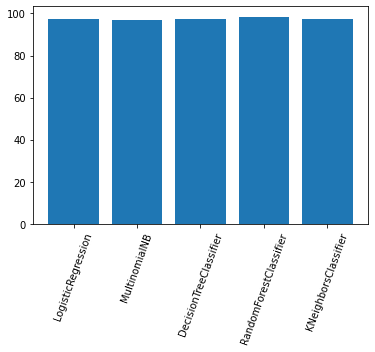

In [45]:
plt.bar(cls_name, accuracy)
plt.xticks(rotation=70)

RandomForestClassifier is better than others with 98.41% accuracy

In [47]:
# Save to csv

lg_model = LogisticRegression().fit(train_tfidf_model,train_df.sentiment)
lg_lbl_pred = model.predict(test_tfidf_model)

In [ ]:
lg_lbl_pred_df = pd.DataFrame({'tweet_id': test_df.tweet_id,
                            'text' : test_df.text,
                            'lg_reg' : lg_lbl_pred})
lg_lbl_pred_df.head()

In [ ]:
lg_lbl_pred_df.to_csv('sentiments.csv', index=False)